# Import libraries

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import json
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
# from model import LinearRegression


In [96]:
class MyLinearRegression:
    def __init__(self, learning_rate=0.1, epochs=10000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights, self.bias = None, 0
        self.costs = []
        self.n = 0

    @staticmethod
    def calc_cost(loss):
        return np.mean((loss ** 2))

    def fit(self, X, Y):
        self.costs = []
        self.weights = np.random.rand(X.shape[1])
        self.bias = 0
        self.n = X.shape[0]
        for epoch in range(self.epochs):
            loss = (np.dot(X, self.weights) + self.bias) - Y
            weight_gradient = 2 * np.dot(X.T, loss) / self.n
            bias_gradient = 2 * np.mean(loss)
            self.weights -= self.learning_rate * weight_gradient
            self.bias -= self.learning_rate * bias_gradient
            cost = self.calc_cost(loss)
            self.costs.append(cost)
            if epoch % (self.epochs / 10) == 0:
                print(f"Epoch {epoch} Cost {cost}")

    def coef_(self):
        return np.asarray(self.weights)

    def summary(self):
        print("Weights:", self.weights)
        print("Bias:", self.bias)
        print("Costs:", self.costs)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def save(self, filename):
        res = {
            "weights": self.weights.tolist(),
            "bias": self.bias
        }
        res = json.dumps(res)
        # date_time = datetime.datetime.now().strftime("%H_%M_%S_%d_%m_%Y")
        file = open(f"./models/{filename}.json", "w")
        file.write(res)
        file.close()


In [97]:
def load_model(path):
    file = open(path, "r")
    res = json.loads(file.read())
    file.close()
    model = MyLinearRegression()
    model.weights = res["weights"]
    model.bias = res["bias"]
    return model


In [98]:
def r2score(y_hat, y):
    des = np.sum((y_hat - y) ** 2)
    num = np.sum((y-y.mean()) ** 2)
    r2 = 1 - (des / num)
    return r2


# Load scaled data

In [99]:
dataset = pd.read_csv('./data/standardize_data.csv')
print(dataset.shape)
number_of_rows, number_of_columns = dataset.shape
columns = dataset.keys()


(25000, 44)


# Calculate covariance and correlation

In [100]:
def covariance(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    return ((np.sum((x - x_mean) * (y - y_mean))) / ((number_of_rows) - 1))


In [101]:
def correlation(x, y):
    std_x = covariance(x, x)
    std_y = covariance(y, y)
    return covariance(x, y) / np.sqrt(std_x * std_y)


In [102]:
X, Y = dataset.iloc[:, :-1], dataset.iloc[:, -1]
X = pd.DataFrame(X, columns=columns[: -1])
Y = pd.Series(Y)


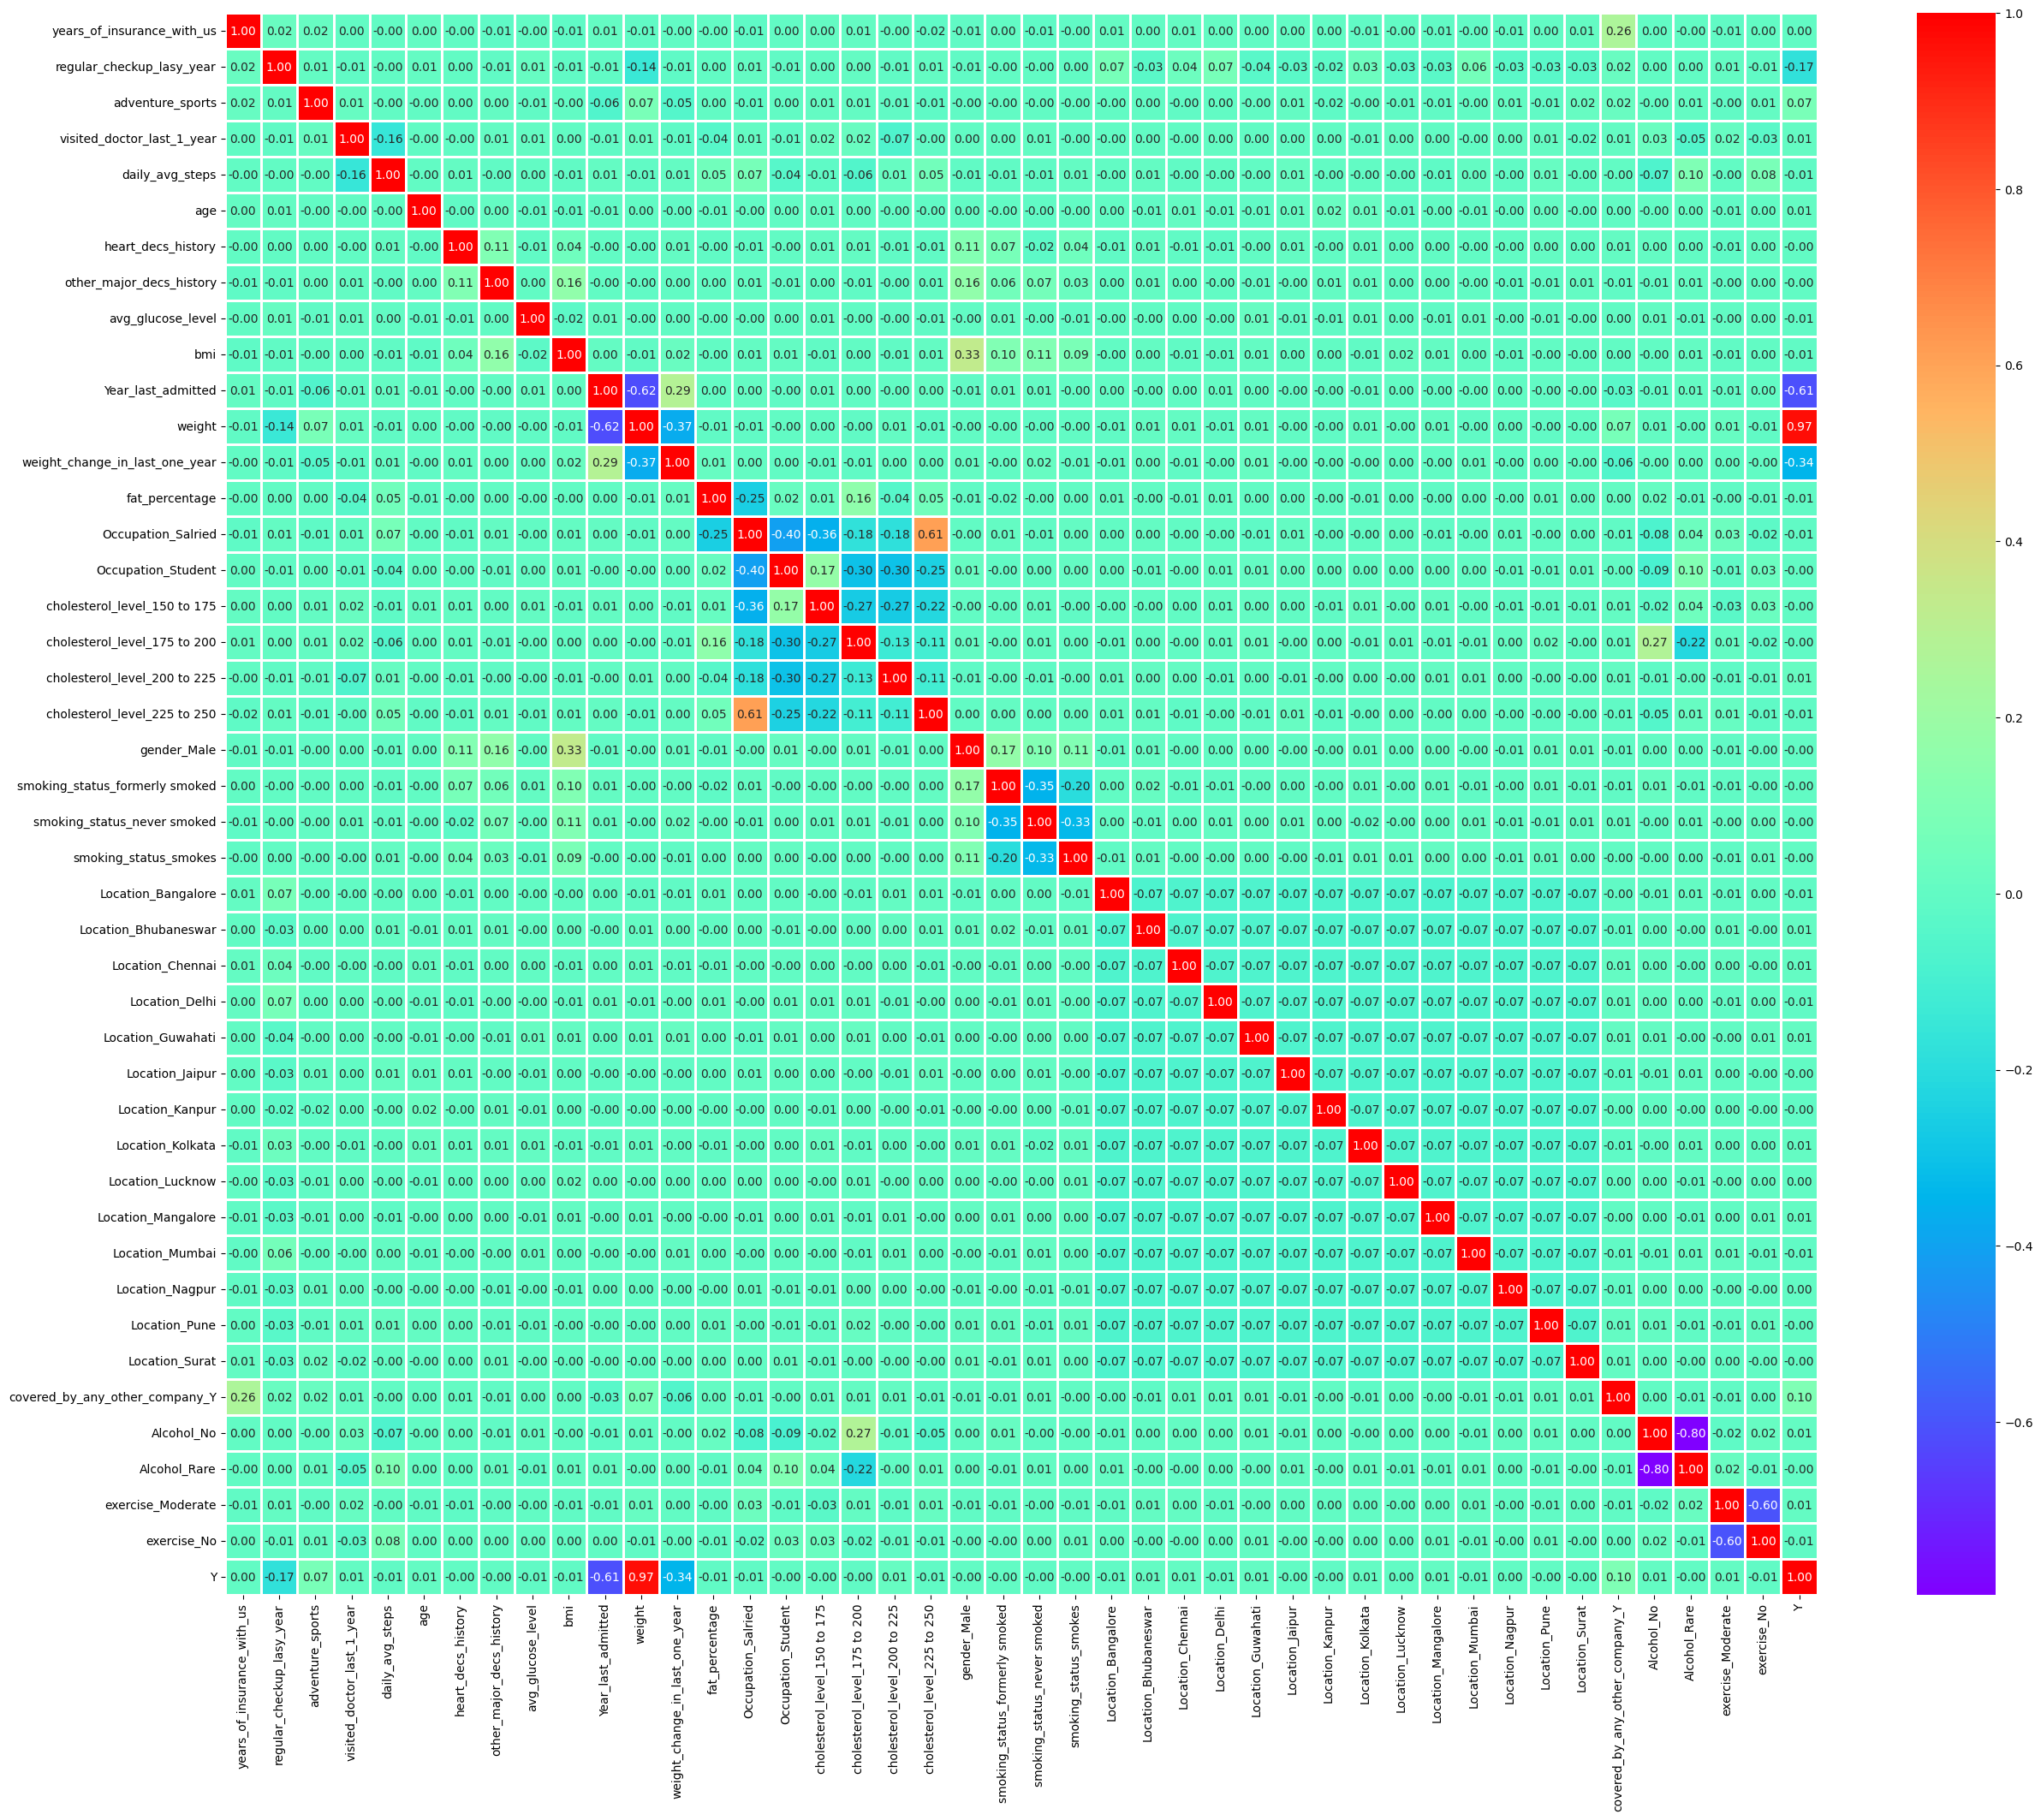

In [103]:
corr = {}
for i in range(len(X.columns)):
    cur = []
    for j in range(len(X.columns)):
        cur.append(correlation(X.iloc[:, i], X.iloc[:, j]))
    cur.append(correlation(X.iloc[:, i], Y))
    corr[X.columns[i]] = cur
cur = []
for i in range(len(X.columns)):
    cur.append(correlation(X.iloc[:, i], Y))
cur.append(correlation(Y, Y))
corr['Y'] = cur
corr = pd.DataFrame(corr, columns=corr.keys(), index=corr.keys())
fig, ax = plt.subplots(figsize=(30, 24))
sns.heatmap(corr, annot=True, cmap='rainbow', linewidths=1,
            linecolor='white', fmt=".2f", ax=ax)
plt.show()


In [ ]:
corr1 = dataset.corr()
corr1.to_csv("./corr.csv")
# paint correlation
corr = pd.DataFrame(corr1, columns=corr1.keys(), index=corr1.keys())
fig, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(corr, annot=True, cmap='PiYG', linewidths=1,
            linecolor='white', fmt='.2f', ax=ax)
plt.show()


## Split dataset into training and test sets 

In [104]:
def train_test_split(dataset, test_size=0.2):
    train_size = int(len(X) * (1 - test_size))
    test_size = int(len(X) * test_size)
    train = dataset.sample(train_size)
    test = dataset.sample(test_size)
    X_train = train.iloc[:, :-1]
    X_test = test.iloc[:, :-1]
    Y_train = train.iloc[:, -1]
    Y_test = test.iloc[:, -1]
    pd.DataFrame(Y_test).to_csv("./data/linear/Y_test.csv", index=False)
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = train_test_split(dataset, 0.3)


In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset, 0.3)


## Train model and save

### All features

Epoch 0 Cost 943383333.6527977
Epoch 1500 Cost 11925873.255674245
Epoch 3000 Cost 11925873.255674245
Epoch 4500 Cost 11925873.255674245
Epoch 6000 Cost 11925873.255674245
Epoch 7500 Cost 11925873.255674245
Epoch 9000 Cost 11925873.255674245
Epoch 10500 Cost 11925873.255674245
Epoch 12000 Cost 11925873.255674245
Epoch 13500 Cost 11925873.255674245
Epoch 0 Cost 943385331.3105083
Epoch 1500 Cost 18032665.505506776
Epoch 3000 Cost 12376742.458718687
Epoch 4500 Cost 11973420.834547115
Epoch 6000 Cost 11930948.495925726
Epoch 7500 Cost 11926415.25075127
Epoch 9000 Cost 11925931.13824128
Epoch 10500 Cost 11925879.437281718
Epoch 12000 Cost 11925873.91584333
Epoch 13500 Cost 11925873.326177465
Epoch 0 Cost 943378159.6236885
Epoch 1500 Cost 11925873.262657154
Epoch 3000 Cost 11925873.255674247
Epoch 4500 Cost 11925873.255674247
Epoch 6000 Cost 11925873.255674245
Epoch 7500 Cost 11925873.255674245
Epoch 9000 Cost 11925873.255674245
Epoch 10500 Cost 11925873.255674245
Epoch 12000 Cost 11925873.25

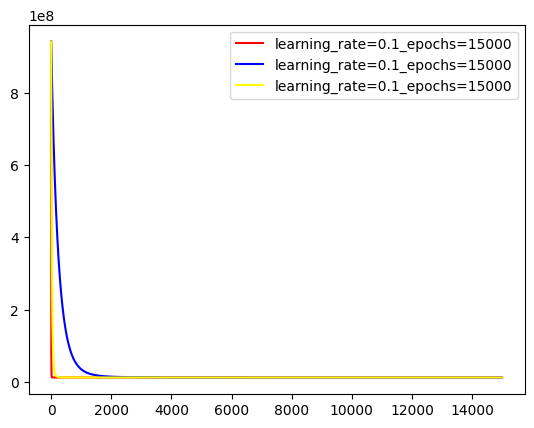

In [114]:
model1 = MyLinearRegression(learning_rate=0.1, epochs=15000)
model2 = MyLinearRegression(learning_rate=0.001, epochs=15000)
model3 = MyLinearRegression(learning_rate=0.01, epochs=15000)

model1.fit(X_train, Y_train)
model2.fit(X_train, Y_train)
model3.fit(X_train, Y_train)

plt.plot(model1.costs,
         label=f"learning_rate={model.learning_rate}_epochs={model.epochs}", color="red")
plt.plot(model2.costs,
         label=f"learning_rate={model.learning_rate}_epochs={model.epochs}", color="blue")
plt.plot(model3.costs,
         label=f"learning_rate={model.learning_rate}_epochs={model.epochs}", color="yellow")
plt.legend()
plt.show()

model.save("model_linear_all")


In [108]:
y_hat = model.predict(X_test)

print(r2score(y_hat, Y_test))
y_hat = pd.Series(y_hat)
y_hat.to_csv("./data/linear/predicted_all.csv",
             header=["Predicted"], index=False)


0.9455959279502816


#### Result using sklearn

In [109]:
reg = LinearRegression()
reg = reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
Y_pred = pd.DataFrame(Y_pred)
Y_pred.to_csv("./data/linear/sklearn_pred_all.csv",
              header=["Predicted"], index=False)
print("Mean Squared Error: ", mean_squared_error(Y_test, Y_pred))
print("R2 Score: ", r2_score(Y_test, Y_pred))
print("Mean Absolute Error: ", mean_absolute_error(Y_test, Y_pred))
print("Weights: ", reg.coef_.tolist())


Mean Squared Error:  11375953.437231699
R2 Score:  0.9455959279502816
Mean Absolute Error:  2701.1130413934575
Weights:  [-43.157364819088826, -553.9337314847747, 28.01943487423241, -67.46915737817925, -5.576949622402718, 52.47955199084872, 60.147863650459314, 18.569733830634036, -10.813353570846287, -13.293148393709476, -241.20315060944105, 13745.573970203659, 294.721427041152, -22.31162567523609, 40.565456254589215, 54.52562996624215, 31.860061809580966, 55.85564766794572, 80.0353046174126, 38.29949117035715, -15.596310478148549, -2.81026956573833, 16.076632182425314, -11.803166430792672, 51.61135641830691, 61.818061596716895, 62.55265959566055, 135.4667325546749, 74.9319825283329, 72.20690821577597, 64.27894808641466, 56.976748992573455, 84.54850691854278, 61.94483932415522, 65.58162080487745, 79.35381387768842, 26.767106146320355, 64.21269871352642, 538.7508217632293, 12.309775509220167, 16.92127030110302, 43.52941409812623, 37.18240288515102]


### Features with high correlation

#### Feature selection

In [110]:
for column in X.columns:
    if abs(corr[column]["Y"]) < 0.2:
        X_train = X_train.drop(column, axis=True)
        X_test = X_test.drop(column, axis=True)
# print(dataset.columns)
print(X_train.shape)
print(X_test.shape)

(17500, 3)
(7500, 3)


#### Train

Epoch 0 Cost 943361394.8553331
Epoch 1500 Cost 11925873.255674245
Epoch 3000 Cost 11925873.255674245
Epoch 4500 Cost 11925873.255674245
Epoch 6000 Cost 11925873.255674245
Epoch 7500 Cost 11925873.255674245
Epoch 9000 Cost 11925873.255674245
Epoch 10500 Cost 11925873.255674245
Epoch 12000 Cost 11925873.255674245
Epoch 13500 Cost 11925873.255674245


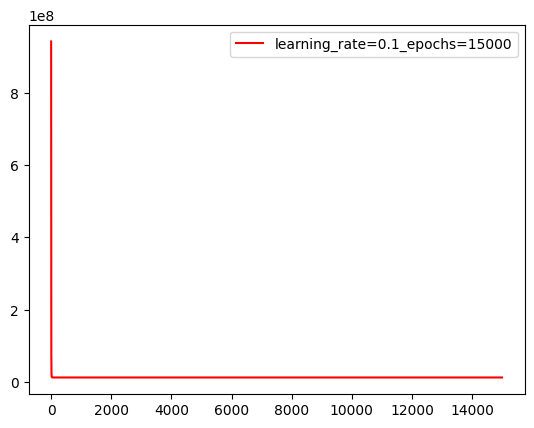

In [111]:
model = MyLinearRegression(learning_rate=0.1, epochs=15000)

model.fit(X_train, Y_train)

plt.plot(model.costs,
         label=f"learning_rate={model.learning_rate}_epochs={model.epochs}", color="red")
plt.legend()
plt.show()

model.save("model_linear_some")


In [112]:
y_hat = model.predict(X_test)
print(r2score(y_hat, Y_test))
y_hat = pd.DataFrame(y_hat)
y_hat.to_csv("./data/linear/predicted_some.csv",
             header=["Predicted"], index=False)


0.9429208216349643


#### Result using sklearn

In [113]:
reg = LinearRegression()
reg = reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
Y_pred = pd.DataFrame(Y_pred)
Y_pred.to_csv("./data/linear/sklearn_pred_some.csv",
              header=["Predicted"], index=False)
print("Mean Squared Error: ", mean_squared_error(Y_test, Y_pred))
print("R2 Score: ", r2_score(Y_test, Y_pred))
print("Mean Absolute Error: ", mean_absolute_error(Y_test, Y_pred))
print("Weights: ", reg.coef_.tolist())


Mean Squared Error:  11935321.214976048
R2 Score:  0.9429208216349643
Mean Absolute Error:  2773.0725675099093
Weights:  [-151.0418016348981, 13924.48916513395, 310.51948781599276]


In [ ]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


def r2Score(y_true, y_pred):
    return 1 - np.sum((y_true - y_pred) ** 2) \
    / np.sum((y_true - np.mean(y_true)) ** 2)


def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
